## Twitch popularity

En este notebook vamos a analizar los datos de la plataforma Twitch. Como nos ha ocurrido con la otra parte del proyecto los datos para sacar de la API son escass y no son retroactivos por lo que hemos necesitado buscar algún dataframe construido de propio con estos datos. El que hemos elegido es: https://www.kaggle.com/rankirsh/evolution-of-top-games-on-twitch?select=Twitch_game_data.csv que contiene los datos desde 2016 hasta 2021

Importamos las librerías necesarias para trabajar en este notebook

In [41]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore') #Evitamos que salgan algunos warnings

Leemos nuestros archivos con la información histórica de Twitch

In [2]:
df_twitch_global = pd.read_csv('Twitch_global_data.csv')

In [3]:
df_twitch = pd.read_csv('Twitch_game_data.csv', encoding='latin-1')

## Evolución de la plataforma Twitch a lo largo de los años

En este apartado vamos a procesar y analizar visualmente la evolución que ha tenido la plataforma en los últimos años

In [10]:
#Echamos un vistazo a los datos
df_twitch_global.head(n=10)

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,"12,149"
1,2016,2,441859897,635769,1308032,7038520,20427,"12,134"
2,2016,3,490669308,660389,1591551,7390957,20271,"12,234"
3,2016,4,377975447,525696,1775120,6869719,16791,"12,282"
4,2016,5,449836631,605432,1438962,7535519,19394,"12,424"
5,2016,6,446429345,620903,1755888,6663363,18818,"12,374"
6,2016,7,446331825,600715,1453743,7336215,18030,"12,961"
7,2016,8,382117373,514289,1334490,6837386,16592,"13,693"
8,2016,9,362833210,504635,1186009,6623528,16880,"13,484"
9,2016,10,453035001,609737,1549150,6771852,19250,"13,973"


In [8]:
df_twitch_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            64 non-null     int64 
 1   Month           64 non-null     int64 
 2   Hours_watched   64 non-null     int64 
 3   Avg_viewers     64 non-null     int64 
 4   Peak_viewers    64 non-null     int64 
 5   Streams         64 non-null     int64 
 6   Avg_channels    64 non-null     int64 
 7   Games_streamed  64 non-null     object
dtypes: int64(7), object(1)
memory usage: 4.1+ KB


Creamos un gráfico con la evolución de las horas vistas en Twitch por fecha.

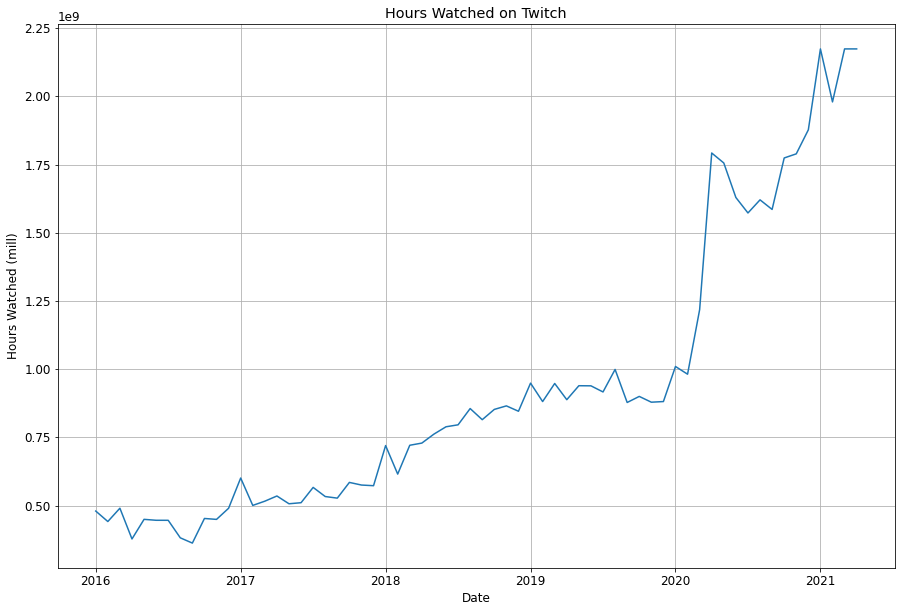

In [5]:
# Al no tener fechas, creamos una lista que contará los valores de los años
year_list = []
year = 0
for index, row in df_twitch_global.iterrows(): #Iteramos y por cada mes enero pasamos al siguiente año en la etiqueta de datos del eje X
    if row['Month'] == 1:
        year_list.append(year) 
    year = year + 1

fig, ax = plt.subplots(figsize=(15,10))
# plotting each month's hours watched in billions
ax.plot(df_twitch_global['Hours_watched'])
ax.set_ylabel('Hours Watched (mill)')
ax.set_xlabel('Date')
ax.set_title('Hours Watched on Twitch')
ax.set_xticks(year_list)
ax.set_xticklabels(['2016', '2017', '2018', '2019', '2020', '2021']) #Estos son los valores que vamos a procesar en el eje X
plt.grid()
plt.show()

Como vemos en la gráfica, el covid-19 ha tenido un gran impacto en esta plataforma. Prácticamente se duplica en 1 año desde 2020 el número de horas vistas. Al igual que en la gráfica del número de jugadores de Steam, aquí también ha tenido un gran impacto.

## Analisis de las variables del dataset

Aquí vamos a analizar y explorar los datos del dataset que tenemos con la dimensión de juegos.

In [6]:
df_twitch.describe()

,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
count,12750.000000,12750.000000,12750.000000,1.275000e+04,1.275000e+04,12750.000000,1.275000e+04,12750.000000,12750.000000,12750.000000
mean,100.598039,6.270588,2018.196078,4.275711e+06,4.966230e+04,525.592706,1.607308e+04,5868.964706,194.265882,84.357399
std,57.821333,3.482490,1.546969,1.506778e+07,1.182841e+05,2543.712078,5.354057e+04,20709.039412,720.264321,379.351774
min,1.000000,1.000000,2016.000000,8.981100e+04,4.410000e+02,1.000000,0.000000e+00,120.000000,0.000000,2.270000
25%,50.000000,3.000000,2017.000000,3.325805e+05,7.656750e+03,47.000000,1.345000e+03,456.000000,15.000000,15.960000
50%,101.000000,6.000000,2018.000000,7.180870e+05,1.834900e+04,109.000000,3.767500e+03,981.500000,38.000000,29.065000
75%,151.000000,9.000000,2020.000000,1.975240e+06,4.170875e+04,286.750000,9.889000e+03,2715.500000,108.000000,58.095000
max,200.000000,12.000000,2021.000000,3.445520e+08,3.123208e+06,129860.000000,1.013029e+06,479209.000000,13789.000000,13601.870000


In [7]:
# Tamaño del dataset
df_twitch.shape

(12750, 12)

Echamos un vistazo por si hay valores nulos

In [8]:
missing_values = df_twitch.isnull().sum()
missing_values

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

Al existir solamente un valor nulo en la columna de Game la eliminamos porque no podemos determinad de qué juego se trata

In [9]:
df_twitch = df_twitch.dropna()

### Modificamos las fechas

No tenemos una columna específica de fecha por lo que vamos a crearla para facilitar a otras herramientas el procesado de datos

In [4]:
# Unificamos fechas para formatearlas en una columna de tipo date
df_twitch['Day'] = '01' #Creamos una columna nueva de día porque el mínimo que acepta to_datetime es día, mes y año.

In [5]:
#Transformamos nuestras columnas en una nueva columna de fecha
df_twitch['date'] = pd.to_datetime(df_twitch[['Year', 'Month', 'Day']])
df_twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Day,date
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29,01,2016-01-01
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62,01,2016-01-01
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26,01,2016-01-01
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29,01,2016-01-01
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03,01,2016-01-01


## Visualización de datos

En esta sección vamos a analizar las diferentes columnas y variables que vamos a poder utilizar para contruir nuestro algoritmo de ML.

### Juegos más vistos totales

Lo primero miraremos cuáles son los 10 juegos más vistos desde que tenemos datos (2016)

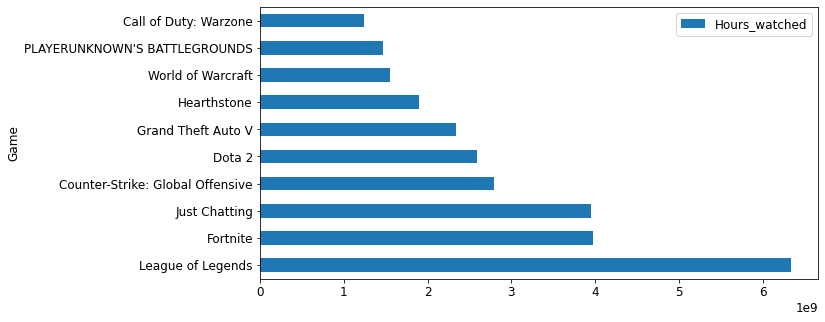

In [5]:
# Clasificamos qué juegos son los más vistos desde 2016
df_twitch_games = df_twitch.groupby(['Game'])['Hours_watched'].sum().reset_index()
df_twitch_games.sort_values(['Hours_watched'], ascending=False).head(10).plot(kind='barh', y='Hours_watched', x='Game', figsize=(10,5));


Vemos que de entre los 3 juegos más vistas entra una categoría:Just Chatting. Se trata de una categoría donde no se juega a nada específco, sino que el streamer interactúa con el fan por medio del chat. El resto de juegos es el League of Leguends, famoso por sus torneos que aglomeran a millones de espectadores y Fortnite que popularizó la forma de juego Battle Royale.

### Juegos maás vistos desde covid-19

Ahora vamos a hacer un analísis de cuáles son los juegos más vists después del covid-19

In [12]:
# Agrupamos los juegos más vistos desde 2020
from_date = '2020-01-01'
mask = (df_twitch['date'] > from_date)

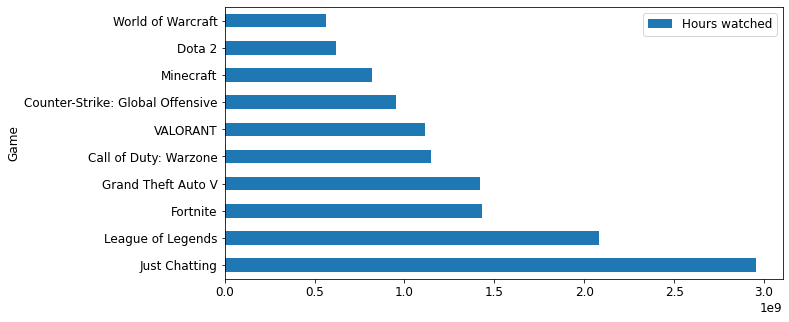

In [22]:
# Clasificamos qué juegos son los más vistos desde 2020
df_twitch_2020 = df_twitch.loc[mask]
df_twitch_games_2020 = df_twitch_2020.groupby(['Game'])['Hours_watched'].sum().reset_index()
df_twitch_games_2020.sort_values(['Hours_watched'], ascending=False).head(10).plot(kind='barh', y='Hours_watched', x='Game', figsize=(10, 5), label='Hours watched');

### Evolución de la creación de contenido en la plataforma total

Vamos a analizar la evolución de los creadores de contenido en Twitch. Las métricas que vamos a usar serán:
* Avg channels: Nos va a indicar la evolución de los canales que retransmiten contenido
* Streamers: Aquí veremos los datos de los creadores de contenido

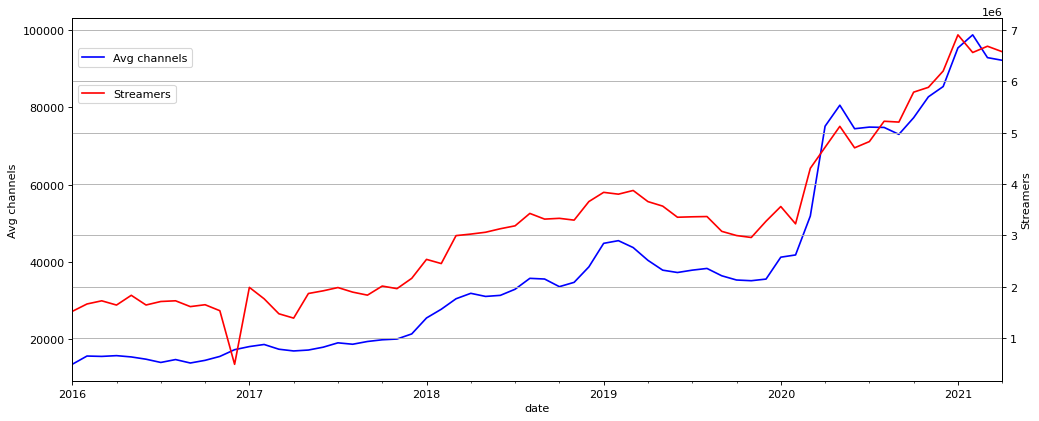

In [28]:
#Creamos nuestra figura
fig,ax = plt.subplots(figsize=(15, 6), dpi=80)
df_twitch_year = df_twitch.groupby(['date'])['Avg_channels'].sum().plot(color="blue", label="Avg channels") #Agrupamos por fecha y canales
ax.set_ylabel('Avg channels')
ax.legend(bbox_to_anchor=(0,  0.85, 0.5, 0.8), loc='lower left') #Configuramos la leyenda
ax2=ax.twinx() #Creamos un doble eje
df_twitch_year1 = df_twitch.groupby(['date'])['Streamers'].sum().plot(color="red", label="Streamers", ax=ax2) #Agrupamos por fecha y streamers
ax2.set_ylabel('Streamers')
ax2.legend(bbox_to_anchor=(0,  0.75, 0.5, 0.8), loc='lower left') #Configuramos la leyenda
plt.grid(True)
plt.show();

En la gráfica de evolución vemos claramente el impacto que ha tenido del covid-19. A parte de tener una tendencia alcista hasta 2020 vemos como desde febrero de 2020 se incremente el número de canales creados y la cantidad de creadores de contenido de la plataforma

Vamos a comprobar esta afirmación con una evolución a lo largo de los años de la relación entre las variables Hours_watched vs Streamers. Si ha habido un incremento del interés por parte de los usuarios, los puntos en el scatterplot deberían separarse del eje 0,0 al haber más usuarios streamenado y más usuarios viendo su contenido

<Figure size 1080x576 with 0 Axes>

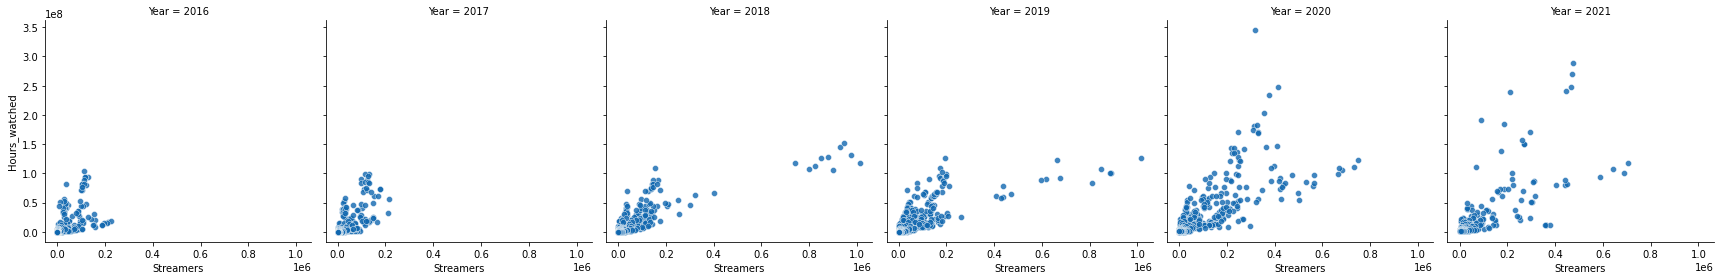

In [32]:
# Creamos un facegrid para ver la evolución de estas variables a lo largo de los años
plt.figure(figsize=(15,8))
g = sns.FacetGrid(df_twitch, col = "Year", 
                  height=4,
                  margin_titles=True, 
                )
g.map(sns.scatterplot, "Streamers", "Hours_watched", color="#1067af", alpha=.8); #Creamos las gráficas scatterplot

Como vemos los puntos cada vez se alejan más del punto 0,0 con lo cual es un claro indicativo de que cada vez más usuarios están usando la plataforma, tanto compartiendo contenido como viendo.

### Relación entre variables

Ahora pasamos a la visualización de la relación entre las variables del dataset. Vamos a crear diferentes gráficos para elegir cuáles son las variables que mas nos interesan para crear nuestro modelo de machine learning.

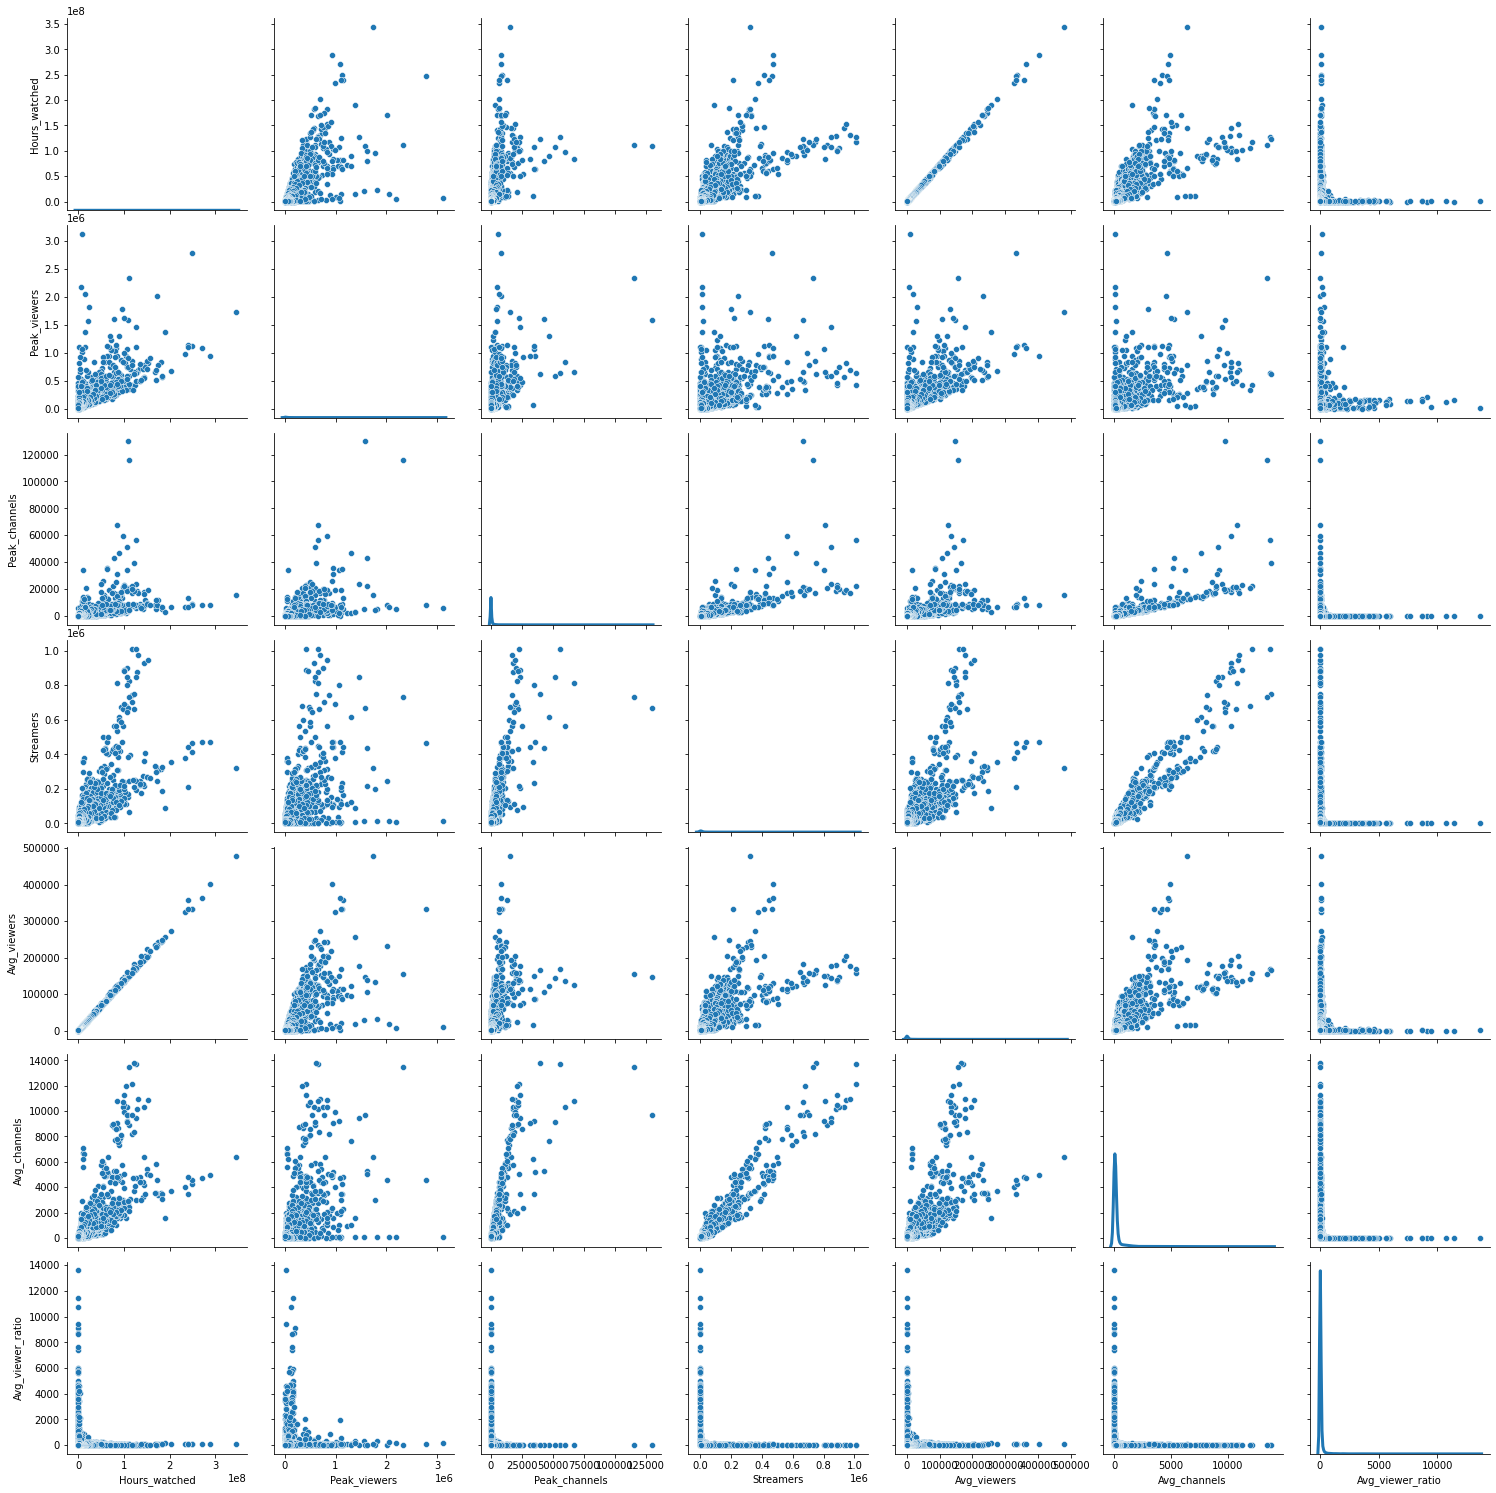

In [43]:
#Creamos un pairgrid que contendrá varios gráficos
grid = sns.PairGrid(df_twitch,
             vars = ['Hours_watched', 'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels', 'Avg_viewer_ratio'],
             size = 3)
grid.map_offdiag(sns.scatterplot, edgecolor="w") #Scatter plot en la parte superior
grid.map_diag(sns.kdeplot, lw=3, legend = False) #kdeplot en la diagonal
plt.show();

Ahora usaremos el mapa de correlación para ver cuánto varían las métricas entre sí

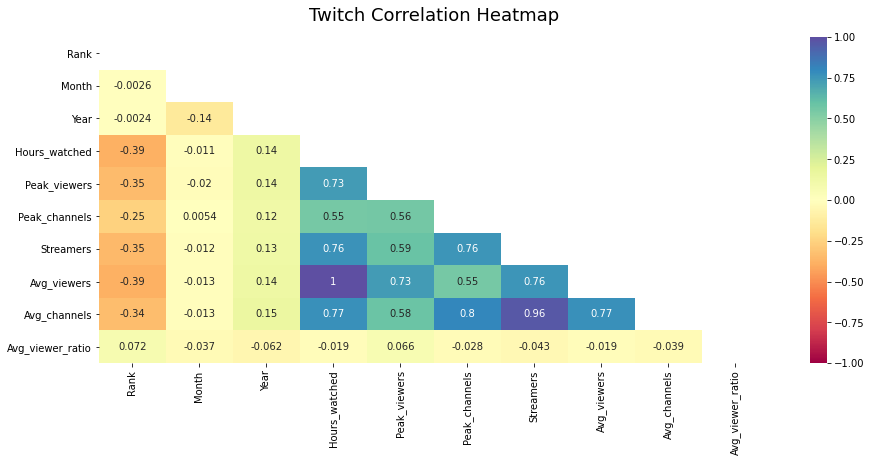

In [36]:
#Creamos y ajustamos la figura de tamaño
plt.figure(figsize=(15, 6))
matrix = np.triu(np.ones_like(df_twitch.corr(), dtype=np.bool)) #Devolvemos solamente el triángulo inferior
heatmap = sns.heatmap(df_twitch.corr(), mask=matrix, vmin=-1, vmax=1, annot=True, cmap='Spectral') #Creamos nuestra matriz con colores personalizados
heatmap.set_title('Twitch Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Observamos que muchas de ellas están estrechamente correlacionadas y nos puede suponer un problema de colinealidad al usar modelos de regresión. Se va a tener que tener en cuenta a la hora de elegir estas variables en el próximo notebook donde hablaremos más de los modelos de machine learning que vamos a utilizar.

### Exportamos los 2 conjuntos de datos: Steam 2016-2021 y Steam post covid

Para usar nuestros datos en el siguiente notebook exportamos los datos procesados a csv

In [20]:
df_twitch.to_csv(r'Twitch data processed.csv', index = False, header=True)

In [21]:
df_twitch_2020.to_csv(r'Twitch data games post covid.csv', index = False, header=True)